<a href="https://colab.research.google.com/github/Monsoon886-cyb/ML-Codes/blob/main/Adaboost_from_scratch_Rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [684]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [685]:
df = pd.DataFrame()

In [686]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [687]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

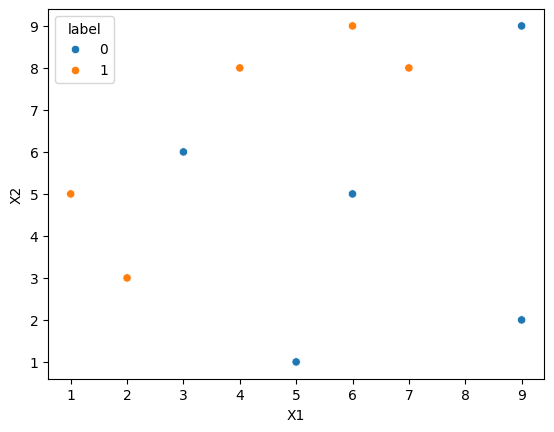

In [688]:
sns.scatterplot(x=df['X1'], y=df['X2'],hue = df['label'])

In [689]:
df['weights'] = 1/df.shape[0]

In [690]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [691]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]


In [692]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

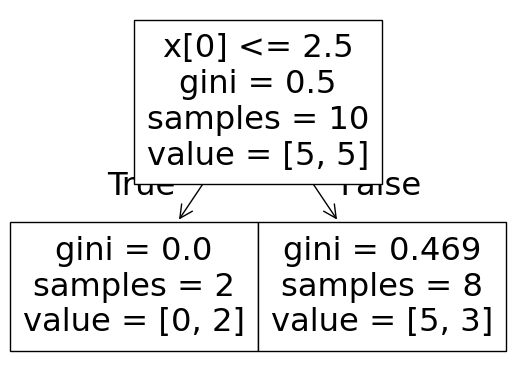

In [693]:
from sklearn.tree import plot_tree
plot_tree(dt)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

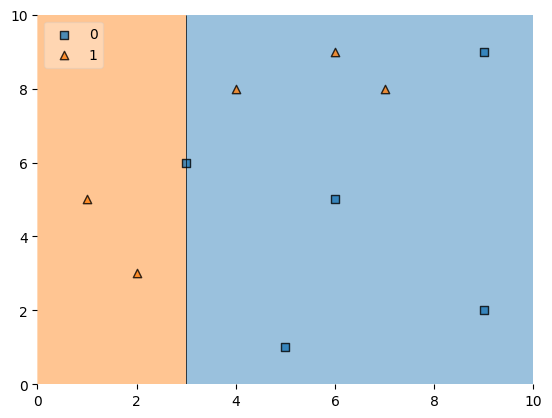

In [694]:
plot_decision_regions(X.values,y.values, clf=dt, legend=2)

In [695]:
y_pred = dt.predict(X)

In [696]:
df['y_pred'] = y_pred

In [697]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [698]:
df.shape[0]

10

In [699]:
def calcError(df):
  error = 0
  for i in range(df.shape[0]):
    if df.iloc[i,2] != df.iloc[i,4]:
      error = error + df.iloc[i,3]
  return np.round(error,3)

In [700]:
err1 = calcError(df)

In [701]:
def calcAlpha(err):
  return 0.5 * np.log((1-err)/(err+0.000000000001))

In [702]:
alpha = calcAlpha(err1)

In [703]:
def boostWeights(alp, df):
  df['upd_weights'] = df['weights'].astype(float)
  for i in range(df.shape[0]):
    if df.iloc[i,2] != df.iloc[i,4]:
      df.iloc[i,5] = np.round(df.iloc[i,3] * np.exp(alp),5)
    elif df.iloc[i,2] == df.iloc[i,4]:
      df.iloc[i,5] = np.round(df.iloc[i,3] * np.exp(-alp),5)

  return df

In [704]:
boostWeights(alpha, df)

,X1,X2,label,weights,y_pred,upd_weights
0,1,5,1,0.1,1,0.06547
1,2,3,1,0.1,1,0.06547
2,3,6,0,0.1,0,0.06547
3,4,8,1,0.1,0,0.15275
4,5,1,0,0.1,0,0.06547
5,6,9,1,0.1,0,0.15275
6,6,5,0,0.1,0,0.06547
7,7,8,1,0.1,0,0.15275
8,9,9,0,0.1,0,0.06547
9,9,2,0,0.1,0,0.06547


In [705]:
df['norm_weights'] = df['upd_weights']/df['upd_weights'].sum()

In [706]:
df['norm_weights'].sum()

np.float64(1.0)

In [707]:
df

,X1,X2,label,weights,y_pred,upd_weights,norm_weights
0,1,5,1,0.1,1,0.06547,0.071432
1,2,3,1,0.1,1,0.06547,0.071432
2,3,6,0,0.1,0,0.06547,0.071432
3,4,8,1,0.1,0,0.15275,0.166659
4,5,1,0,0.1,0,0.06547,0.071432
5,6,9,1,0.1,0,0.15275,0.166659
6,6,5,0,0.1,0,0.06547,0.071432
7,7,8,1,0.1,0,0.15275,0.166659
8,9,9,0,0.1,0,0.06547,0.071432
9,9,2,0,0.1,0,0.06547,0.071432


In [708]:
df['upper_range'] = np.cumsum(df['norm_weights'])

In [709]:
df['lower_range'] = df['upper_range'] - df['norm_weights']

In [710]:
df[['X1','X2','label','y_pred','weights','upd_weights','lower_range','upper_range']]

,X1,X2,label,y_pred,weights,upd_weights,lower_range,upper_range
0,1,5,1,1,0.1,0.06547,0.000000,0.071432
1,2,3,1,1,0.1,0.06547,0.071432,0.142863
2,3,6,0,0,0.1,0.06547,0.142863,0.214295
3,4,8,1,0,0.1,0.15275,0.214295,0.380954
4,5,1,0,0,0.1,0.06547,0.380954,0.452386
5,6,9,1,0,0.1,0.15275,0.452386,0.619046
6,6,5,0,0,0.1,0.06547,0.619046,0.690477
7,7,8,1,0,0.1,0.15275,0.690477,0.857137
8,9,9,0,0,0.1,0.06547,0.857137,0.928568
9,9,2,0,0,0.1,0.06547,0.928568,1.000000


In [711]:
def create_new_df(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index , row in df.iterrows():
      if row['upper_range'] > a and a > row['lower_range']:
        indices.append(index)
  return indices

In [712]:
df2 = df.iloc[create_new_df(df),[0,1,2,3]]

In [713]:
df2

,X1,X2,label,weights
4,5,1,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1


In [714]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [715]:
X1 = df2.iloc[:,0:2].values
y1 = df2.iloc[:,2].values

In [716]:
dt2.fit(X1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

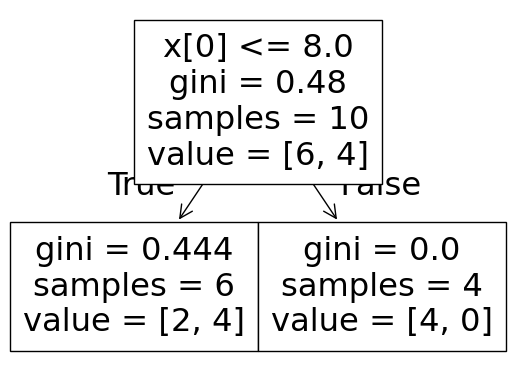

In [717]:
plot_tree(dt2)

<Axes: >

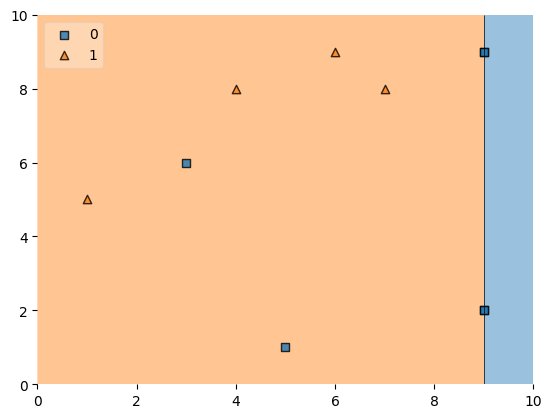

In [718]:
plot_decision_regions(X1,y1, clf=dt2, legend=2)

In [719]:
df2['y_pred'] = dt2.predict(X1)

In [720]:
df2

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,0


In [721]:
alpha2 = calcAlpha(calcError(df2))

In [722]:
boostWeights(alpha2, df2)

,X1,X2,label,weights,y_pred,upd_weights
4,5,1,0,0.1,1,0.20
8,9,9,0,0.1,0,0.05
0,1,5,1,0.1,1,0.05
7,7,8,1,0.1,1,0.05
9,9,2,0,0.1,0,0.05
9,9,2,0,0.1,0,0.05
2,3,6,0,0.1,1,0.20
3,4,8,1,0.1,1,0.05
5,6,9,1,0.1,1,0.05
8,9,9,0,0.1,0,0.05


In [723]:
df2['norm_weights'] = df2['upd_weights']/df2['upd_weights'].sum()

In [724]:
df2['norm_weights'].sum()

np.float64(1.0)

In [725]:
df2

,X1,X2,label,weights,y_pred,upd_weights,norm_weights
4,5,1,0,0.1,1,0.20,0.2500
8,9,9,0,0.1,0,0.05,0.0625
0,1,5,1,0.1,1,0.05,0.0625
7,7,8,1,0.1,1,0.05,0.0625
9,9,2,0,0.1,0,0.05,0.0625
9,9,2,0,0.1,0,0.05,0.0625
2,3,6,0,0.1,1,0.20,0.2500
3,4,8,1,0.1,1,0.05,0.0625
5,6,9,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625


In [726]:
df2['upper_range'] = np.cumsum(df2['norm_weights'])
df2['lower_range'] = df2['upper_range'] - df2['norm_weights']

In [727]:
df2[['X1','X2','label','y_pred','weights','upd_weights','lower_range','upper_range']]

,X1,X2,label,y_pred,weights,upd_weights,lower_range,upper_range
4,5,1,0,1,0.1,0.20,0.0000,0.2500
8,9,9,0,0,0.1,0.05,0.2500,0.3125
0,1,5,1,1,0.1,0.05,0.3125,0.3750
7,7,8,1,1,0.1,0.05,0.3750,0.4375
9,9,2,0,0,0.1,0.05,0.4375,0.5000
9,9,2,0,0,0.1,0.05,0.5000,0.5625
2,3,6,0,1,0.1,0.20,0.5625,0.8125
3,4,8,1,1,0.1,0.05,0.8125,0.8750
5,6,9,1,1,0.1,0.05,0.8750,0.9375
8,9,9,0,0,0.1,0.05,0.9375,1.0000


In [728]:
df3 = df2.iloc[create_new_df(df2),[0,1,2,3]]

In [729]:
df3

,X1,X2,label,weights
5,6,9,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1


In [730]:
dt3 = DecisionTreeClassifier(max_depth = 1)

In [731]:
X3 =df3.iloc[:,0:2].values
y3 = df3.iloc[:,2].values

In [732]:
dt3.fit(X3, y3)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.625, 0.5, '  False')]

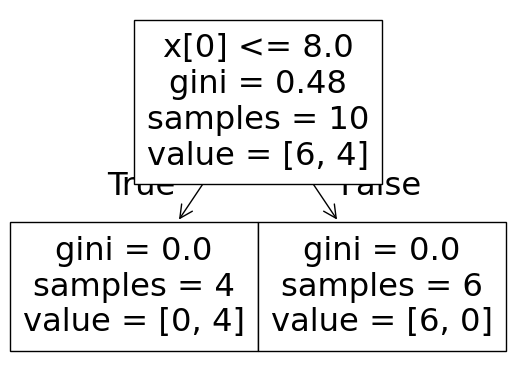

In [733]:
plot_tree(dt3)

<Axes: >

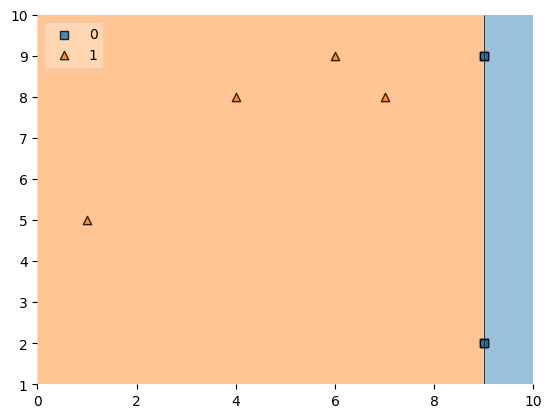

In [734]:
plot_decision_regions(X3,y3, clf=dt3, legend=2)

In [735]:
df3['y_pred'] = dt3.predict(X3)

In [736]:
df3

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
7,7,8,1,0.1,1


In [737]:
alpha3 = calcAlpha(calcError(df3))

In [738]:
boostWeights(alpha3, df3)

,X1,X2,label,weights,y_pred,upd_weights
5,6,9,1,0.1,1,0.0
9,9,2,0,0.1,0,0.0
9,9,2,0,0.1,0,0.0
0,1,5,1,0.1,1,0.0
8,9,9,0,0.1,0,0.0
3,4,8,1,0.1,1,0.0
8,9,9,0,0.1,0,0.0
8,9,9,0,0.1,0,0.0
9,9,2,0,0.1,0,0.0
7,7,8,1,0.1,1,0.0


In [739]:
df3['norm_weights'] = df3['upd_weights']/df3['upd_weights'].sum()
df3['norm_weights'].sum()

np.float64(0.0)

In [740]:
df3

,X1,X2,label,weights,y_pred,upd_weights,norm_weights
5,6,9,1,0.1,1,0.0,NaN
9,9,2,0,0.1,0,0.0,NaN
9,9,2,0,0.1,0,0.0,NaN
0,1,5,1,0.1,1,0.0,NaN
8,9,9,0,0.1,0,0.0,NaN
3,4,8,1,0.1,1,0.0,NaN
8,9,9,0,0.1,0,0.0,NaN
8,9,9,0,0.1,0,0.0,NaN
9,9,2,0,0.1,0,0.0,NaN
7,7,8,1,0.1,1,0.0,NaN


##Prediction


In [741]:
query = np.array([4,8]).reshape(1,2)
dt.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [742]:
dt2.predict(query)

array([1])

In [743]:
dt3.predict(query)

array([1])

In [757]:
val = alpha * -1 + alpha2 * 1 + alpha3 * 1

In [758]:
np.sign(val)

np.float64(1.0)

In [746]:
query1 = np.array([9,9]).reshape(1,2)
dt.predict(query1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [747]:
dt2.predict(query1)

array([0])

In [748]:
dt3.predict(query1)

array([0])

In [755]:
val1 = alpha * -1 + alpha2 * -1 + alpha3 * -1

In [756]:
np.sign(val1)

np.float64(-1.0)